# Investigating the World Development Indicators Dataset.

## The following project aims to investigate and answer interesting questions about the world development indicators dataset that was provided by the World Bank and acquried from Kaggle. 

### Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Reading in the dataset and initial analysis.

In [2]:
df = pd.read_csv('Indicators.csv')

In [3]:
# displaying the first 10 rows.
df.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
df.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [6]:
# counting the number of missing values.
df.isna().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

Upon first analysis, we can see that there are over 5.6 million rows and only 6 columns in this dataset, therefore, this dataset is quite big. We can also see that there are no missing values in this dataset. Perhaps we will not be working with all of the data but rather a section of it for our analysis.

#### The columns are as follows:

* CountryName = Country 
* CountryCode = Country Code
* IndicatorName = Indicator in question
* IndicatorCode = Indicator Code
* Year = Year in question
* Value = Value corresponding to the Indicator in question

### Changing the columns to be more readable.

In [7]:
mapping = {'CountryName': 'Country', 'CountryCode':'country_code', 'IndicatorName':'indicator_name',
          'IndicatorCode':'indicator_code'}

df.rename(columns=mapping, inplace=True)

In [8]:
df.head()

,Country,country_code,indicator_name,indicator_code,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Changing the index to Country and then subsequently dropping the Country column.

In [9]:
df.index = df.Country

In [10]:
df.head()

,Country,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,,
Arab World,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
Arab World,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
Arab World,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
Arab World,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
Arab World,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [11]:
df.drop(columns='Country', inplace=True)

In [12]:
df.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [13]:
df.indicator_name.value_counts()

Population, total                                                                                                    13484
Population growth (annual %)                                                                                         13442
Rural population (% of total population)                                                                             13415
Urban population (% of total)                                                                                        13415
Urban population                                                                                                     13374
Rural population                                                                                                     13374
Urban population growth (annual %)                                                                                   13337
Surface area (sq. km)                                                                                                13090
Land area (sq. k

## Let's look at life expectancy at birth for both male and female, as well as survival to age 65 for both male and female and see if there is a difference.

In [14]:
male_subset = df[df['indicator_name'] == 'Life expectancy at birth, male (years)']

In [15]:
type(male_subset)

pandas.core.frame.DataFrame

In [16]:
male_subset.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,45.862949
Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,60.336875
Central Europe and the Baltics,CEB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,65.415992
East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,46.246988
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,43.834952


In [17]:
m_life_expect = male_subset.groupby('Year')['Value'].mean()

In [18]:
type(m_life_expect)

pandas.core.series.Series

In [19]:
m_life_expect.head()

Year
1960    51.875660
1961    52.406173
1962    52.780612
1963    53.133771
1964    53.612611
Name: Value, dtype: float64

In [20]:
m_life_expect.tail()

Year
2009    67.658283
2010    67.953467
2011    68.313811
2012    68.534471
2013    68.801886
Name: Value, dtype: float64

In [21]:
print(m_life_expect.mean())

60.9551009979612


In [22]:
print(m_life_expect.max() - m_life_expect.min())

16.926225817128177


Text(0,0.5,'Age')

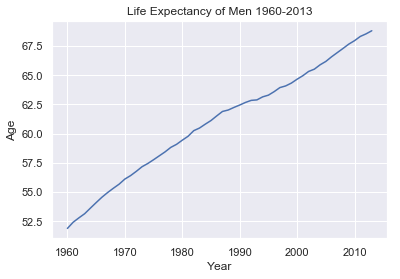

In [23]:
m_life_expect.plot()
plt.title('Life Expectancy of Men 1960-2013')
plt.xlabel('Year')
plt.ylabel('Age')

In [24]:
female_subset = df[df['indicator_name'] == 'Life expectancy at birth, female (years)']

In [25]:
type(female_subset)

pandas.core.frame.DataFrame

In [26]:
female_subset.head(10)

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.883246
Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,64.307102
Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,70.367730
East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,50.112757
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.359607
Euro area,EMU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,72.063254
Europe & Central Asia (all income levels),ECS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,70.140307
Europe & Central Asia (developing only),ECA,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,64.370973
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,72.015095


In [27]:
f_life_expect = female_subset.groupby('Year')['Value'].mean()

In [28]:
type(f_life_expect)

pandas.core.series.Series

In [29]:
f_life_expect.head()

Year
1960    55.614601
1961    56.190940
1962    56.594262
1963    56.991054
1964    57.501386
Name: Value, dtype: float64

In [30]:
f_life_expect.tail()

Year
2009    72.402160
2010    72.680307
2011    73.079536
2012    73.266974
2013    73.521484
Name: Value, dtype: float64

In [31]:
print(f_life_expect.mean())

65.5383543812937


In [32]:
print(f_life_expect.max() - f_life_expect.min())

17.906883220319173


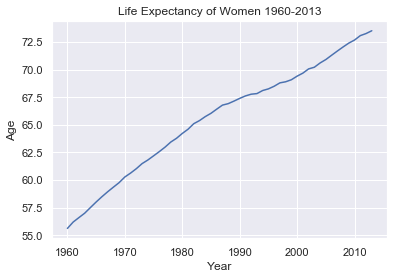

In [33]:
# plotting the female life expectancy span over the years.
f_life_expect.plot()
plt.title('Life Expectancy of Women 1960-2013')
plt.xlabel('Year')
plt.ylabel('Age')
plt.savefig(fname='fplot.jpg')

## Looking at Life expectancy by region?

In [34]:
arb = df.loc['Arab World']

In [35]:
arb.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [36]:
male_subset.head(20)

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,45.862949
Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,60.336875
Central Europe and the Baltics,CEB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,65.415992
East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,46.246988
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,43.834952
Euro area,EMU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,66.622025
Europe & Central Asia (all income levels),ECS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,64.094735
Europe & Central Asia (developing only),ECA,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,58.174095
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,66.681393


In [37]:
arb = male_subset.loc['Arab World']

In [38]:
type(arb)

pandas.core.frame.DataFrame

In [39]:
arb.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,45.862949
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,46.445431
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,47.022175
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,47.595678
Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,48.165251


We already had looked at the life expectancy at birth ofr different genders and had already gotten their difference from the max and the min, therefore, we didn't need to do anything further in terms of subsetting. We could just simply take the different loc indexes for the region and just look at the differences individually.

Text(0,0.5,'Count')

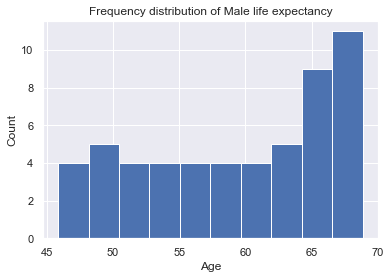

In [40]:
arb['Value'].hist()
#sns.kdeplot(arb['Value'])
#sns.distplot(arb['Value'])
plt.title('Frequency distribution of Male life expectancy')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\Sairam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


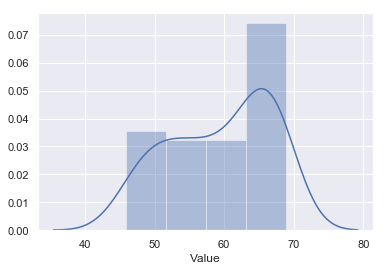

In [41]:
sns.distplot(arb['Value'])

In [42]:
eu = male_subset.loc['European Union']

In [43]:
eu.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,66.681393
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,66.945137
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,66.821944
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,67.022577
European Union,EUU,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,67.441720


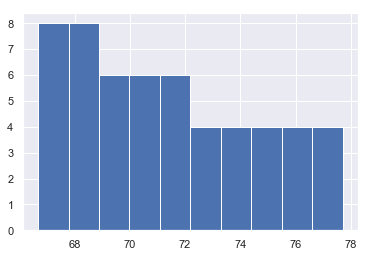

In [44]:
eu['Value'].hist()
#sns.distplot(eu['Value'])

C:\Users\Sairam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


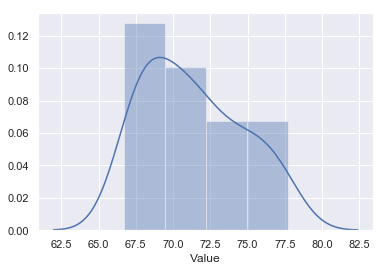

In [45]:
sns.distplot(eu['Value'])

In [46]:
developing = male_subset.loc['East Asia & Pacific (developing only)']

In [47]:
developing.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,43.834952
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,44.116342
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,44.932259
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,46.346666
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,48.332509


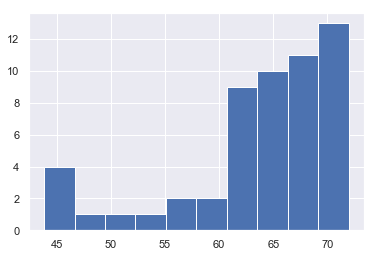

In [48]:
developing['Value'].hist()

In [49]:
female_subset.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.883246
Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,64.307102
Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,70.367730
East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,50.112757
East Asia & Pacific (developing only),EAP,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.359607


In [50]:
fem_arb = female_subset.loc['Arab World']

In [51]:
fem_arb.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.883246
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,48.461243
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,49.042932
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,49.633776
Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,50.234994


C:\Users\Sairam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


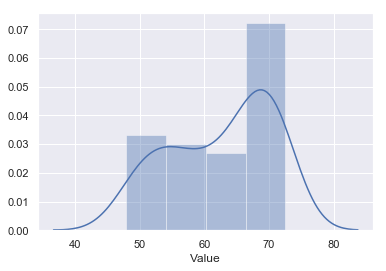

In [52]:
sns.distplot(fem_arb['Value'])

In [53]:
fem_eu = female_subset.loc['European Union']

In [54]:
fem_eu.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,72.015095
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,72.372835
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,72.347706
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,72.638709
European Union,EUU,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,73.154780


C:\Users\Sairam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


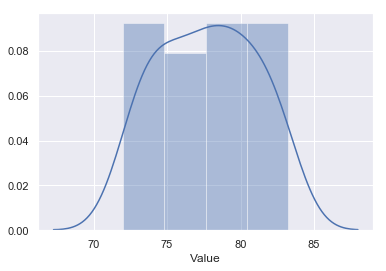

In [55]:
sns.distplot(fem_eu['Value'])

In [56]:
male_high_income = male_subset.loc['High income']

In [57]:
male_high_income.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
High income,HIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,65.139558
High income,HIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,65.507748
High income,HIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,65.504554
High income,HIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,65.661865
High income,HIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,65.986434


In [58]:
male_low_income = male_subset.loc['Low income']

In [59]:
male_low_income.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Low income,LIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,37.773406
Low income,LIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1961,38.166859
Low income,LIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1962,38.559156
Low income,LIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1963,38.960021
Low income,LIC,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1964,39.375046


In [61]:
fem_high_income = female_subset.loc['High income']

In [62]:
fem_high_income.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
High income,HIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,71.085469
High income,HIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,71.523724
High income,HIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,71.613796
High income,HIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,71.910684
High income,HIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,72.338733


In [63]:
fem_low_income = female_subset.loc['Low income']

In [64]:
fem_low_income.head()

,country_code,indicator_name,indicator_code,Year,Value
Country,,,,,
Low income,LIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,40.633621
Low income,LIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1961,41.044247
Low income,LIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1962,41.455364
Low income,LIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1963,41.872877
Low income,LIC,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1964,42.301129


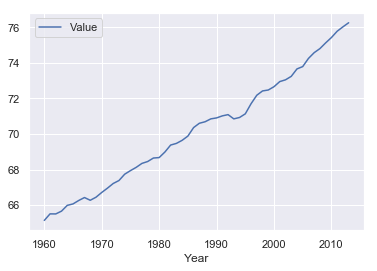

In [65]:
male_high_income.plot(x='Year', y='Value')

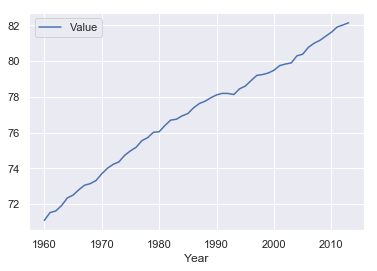

In [67]:
fem_high_income.plot(x='Year', y='Value')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

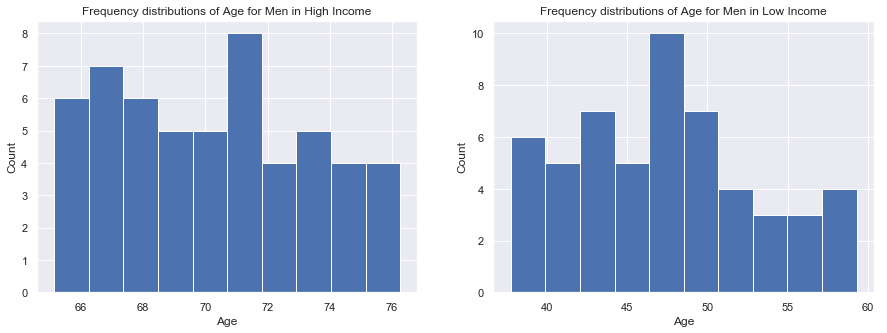

In [85]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(male_high_income['Value'])
plt.title('Frequency distributions of Age for Men in High Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('male_high.jpg')

plt.subplot(1,2,2)
plt.hist(male_low_income['Value'])
plt.title('Frequency distributions of Age for Men in Low Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('male_low.jpg')

plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

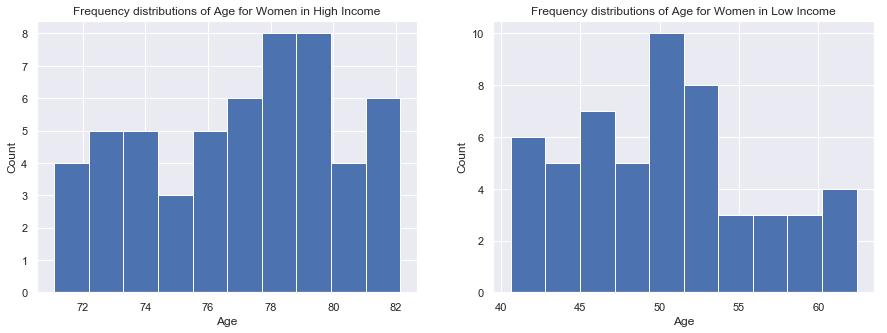

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(fem_high_income['Value'])
plt.title('Frequency distributions of Age for Women in High Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('fem_high.jpg')

plt.subplot(1,2,2)
plt.hist(fem_low_income['Value'])
plt.title('Frequency distributions of Age for Women in Low Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('fem_low.jpg')

plt.tight_layout